# Beer Consumption

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Read dataset

In [2]:
data_path = 'dataset/Consumo_cerveja.csv'

In [3]:
raw_data = pd.read_csv(data_path)

In [4]:
raw_data

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pre-processing

### Dropna

In [5]:
raw_data.isna().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [6]:
raw_data.dropna(axis=0, how='all', inplace=True)

In [7]:
raw_data.isna().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

### Check for zeros

In [8]:
(raw_data==0).sum()

Data                             0
Temperatura Media (C)            0
Temperatura Minima (C)           0
Temperatura Maxima (C)           0
Precipitacao (mm)                0
Final de Semana                261
Consumo de cerveja (litros)      0
dtype: int64

### Replace comma by dot

In [9]:
def real_brazilian_to_float(numeric_string):
    """Converte valores numérios no formato brasileiro 1.234,56 para float"""
    try:
        return float(numeric_string.replace(".", "").replace(",", "."))
    except:
        return numeric_string 

In [10]:
cols_to_dot = ['Temperatura Media (C)',
               'Temperatura Minima (C)',
               'Temperatura Maxima (C)',
               'Precipitacao (mm)']

In [11]:
for cols in cols_to_dot:
    raw_data[cols] = raw_data[cols].apply(real_brazilian_to_float)

### Convert 'Data' column type

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


In [13]:
raw_data['Data'] = raw_data['Data'].astype('datetime64[ns]')

In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB


**Checkpoint**

In [15]:
data_pp = raw_data.copy()

In [16]:
data_pp.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


## Graphical analysis

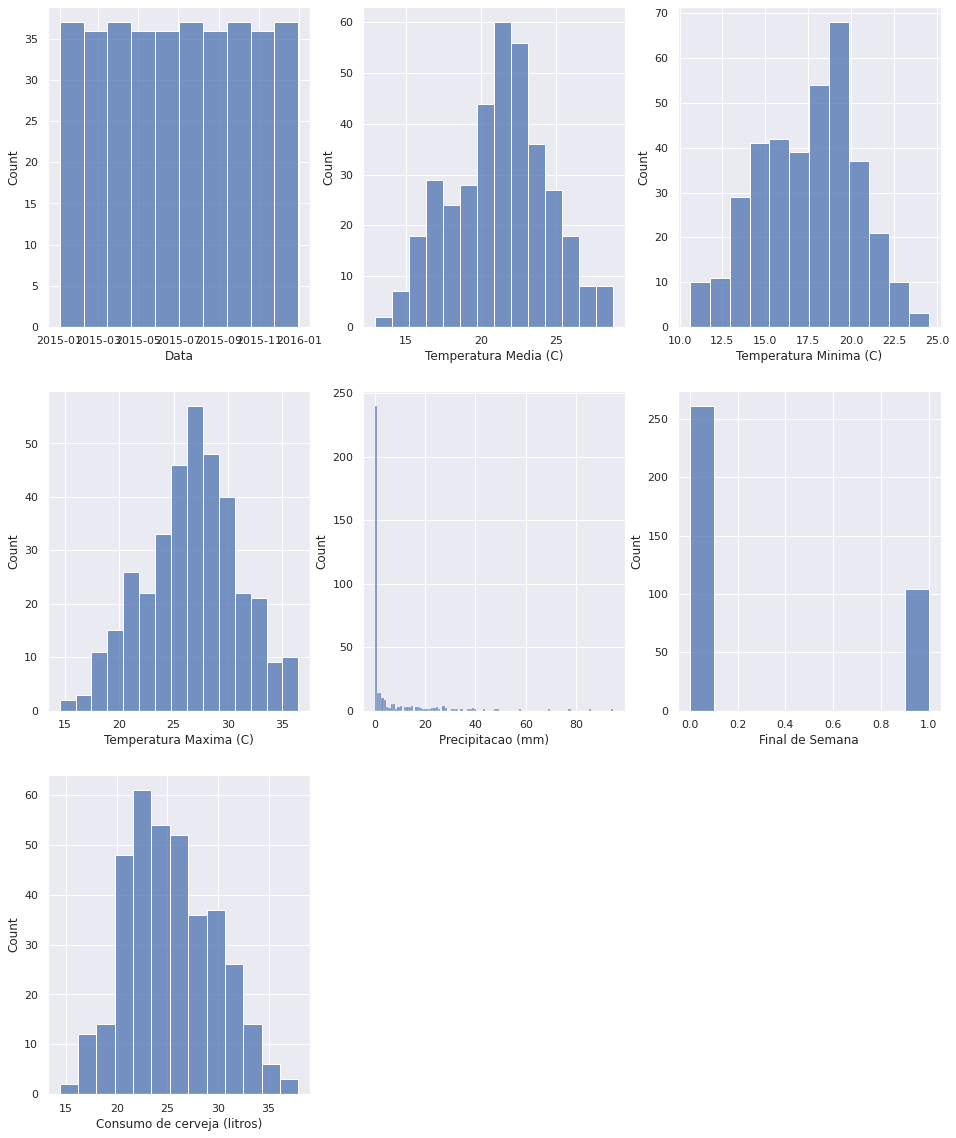

In [17]:
plt.figure(figsize=(16,20))
for i, column in enumerate(data_pp.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(data_pp[column])

### Leading with outliers

In [18]:
q = data_pp['Precipitacao (mm)'].quantile(0.75)
data_cleaned = data_pp[data_pp['Precipitacao (mm)']==0]
# data_cleaned = data_pp

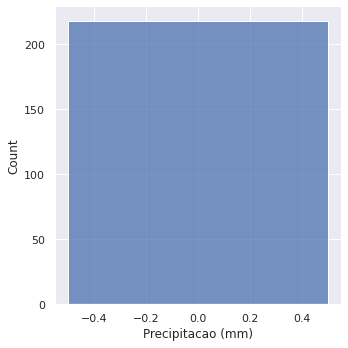

In [19]:
sns.displot(data_cleaned['Precipitacao (mm)'])

In [20]:
rain_data = data_pp[data_pp['Precipitacao (mm)']!=0]

In [21]:
np.corrcoef(rain_data['Precipitacao (mm)'], rain_data['Consumo de cerveja (litros)'])

array([[ 1.        , -0.21943781],
       [-0.21943781,  1.        ]])

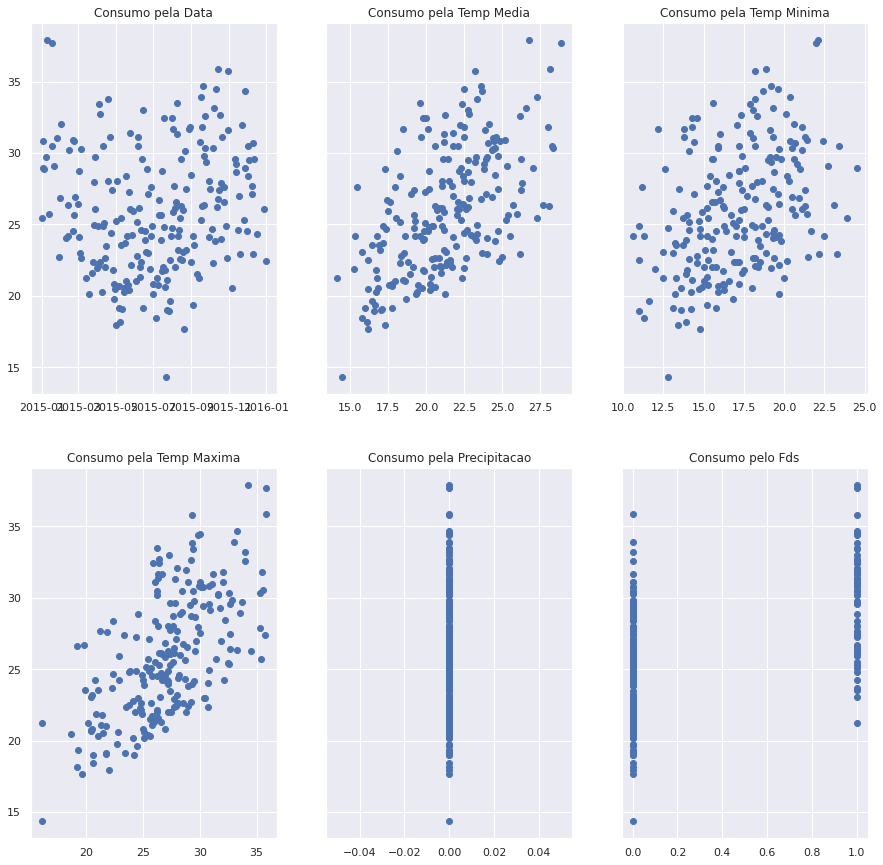

In [22]:
f, axs = plt.subplots(2, 3, sharey=True, figsize =(15,15))
axs[0,0].scatter(data_cleaned['Data'],data_cleaned['Consumo de cerveja (litros)'])
axs[0,0].set_title('Consumo pela Data')
axs[0,1].scatter(data_cleaned['Temperatura Media (C)'],data_cleaned['Consumo de cerveja (litros)'])
axs[0,1].set_title('Consumo pela Temp Media')
axs[0,2].scatter(data_cleaned['Temperatura Minima (C)'],data_cleaned['Consumo de cerveja (litros)'])
axs[0,2].set_title('Consumo pela Temp Minima')
axs[1,0].scatter(data_cleaned['Temperatura Maxima (C)'],data_cleaned['Consumo de cerveja (litros)'])
axs[1,0].set_title('Consumo pela Temp Maxima')
axs[1,1].scatter(data_cleaned['Precipitacao (mm)'],data_cleaned['Consumo de cerveja (litros)'])
axs[1,1].set_title('Consumo pela Precipitacao')
axs[1,2].scatter(data_cleaned['Final de Semana'],data_cleaned['Consumo de cerveja (litros)'])
axs[1,2].set_title('Consumo pelo Fds')


plt.show()

## Standardizing/Normalizing

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_to_stand = data_cleaned.iloc[:,1:]
data_stand = scaler.fit_transform(data_to_stand)

In [24]:
df_stand = pd.DataFrame(data_stand, columns=data_to_stand.columns.tolist())

In [25]:
df_stand.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,1.932324,2.322633,1.340356,0.0,-0.623326,-0.108217
1,1.842765,2.527613,1.588718,0.0,-0.623326,0.702332
2,1.139088,1.810184,0.694615,0.0,1.604298,1.127576
3,0.819235,1.331898,0.297237,0.0,-0.623326,0.685710
4,0.876808,0.819449,1.638390,0.0,-0.623326,0.877785


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_to_norm = data_cleaned.iloc[:,1:]
data_norm = scaler.fit_transform(data_to_norm)

In [27]:
df_norm = pd.DataFrame(data_norm, columns=data_to_norm.columns.tolist())

In [28]:
df_norm.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,0.893733,0.956835,0.832487,0.0,0.0,0.471221
1,0.874659,1.000000,0.883249,0.0,0.0,0.620031
2,0.724796,0.848921,0.700508,0.0,1.0,0.698101
3,0.656676,0.748201,0.619289,0.0,0.0,0.616979
4,0.668937,0.640288,0.893401,0.0,0.0,0.652242


**Checkpoint**

In [29]:
df = df_norm

In [30]:
df.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,218.000000,218.000000,218.000000,218.0,218.000000,218.000000
mean,0.482201,0.467725,0.558539,0.0,0.279817,0.491089
std,0.213463,0.211069,0.204855,0.0,0.449942,0.184013
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.338556,0.309353,0.442893,0.0,0.000000,0.348192
50%,0.477520,0.474820,0.563452,0.0,0.000000,0.471603
75%,0.622616,0.625899,0.684010,0.0,1.000000,0.631082
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


---

## K-means

### Import libraries

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Finding the best k

In [32]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

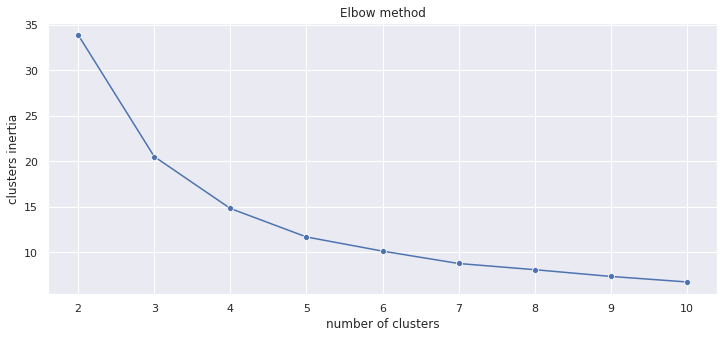

In [33]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")

plt.show()

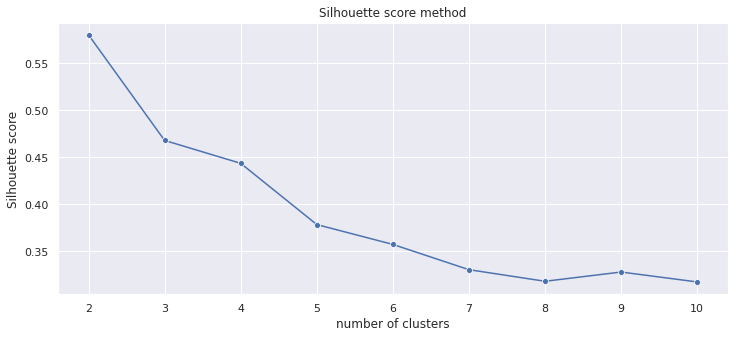

In [34]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")

plt.show()

### Clustering results

In [35]:
Kmean = KMeans(n_clusters=4)
Kmean.fit(df)

KMeans(n_clusters=4)

In [36]:
Kmean.cluster_centers_

array([[3.20560135e-01, 3.23649941e-01, 4.11167513e-01, 0.00000000e+00,
        3.33066907e-16, 3.29037741e-01],
       [6.57405605e-01, 6.41829394e-01, 7.12472806e-01, 0.00000000e+00,
        1.00000000e+00, 7.46159738e-01],
       [6.57793614e-01, 6.29311935e-01, 7.14890017e-01, 0.00000000e+00,
        3.88578059e-16, 5.32840270e-01],
       [3.05466105e-01, 2.82973621e-01, 4.11167513e-01, 0.00000000e+00,
        1.00000000e+00, 5.63922261e-01]])

In [37]:
identified_clusters = Kmean.labels_
identified_clusters

array([2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0,
       0, 1, 3, 0, 2, 2, 1, 1, 2, 2, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3,
       3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 1, 2, 0, 2, 3, 0, 0, 0, 3, 3, 0,
       0, 0, 2, 0, 3, 1, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 3, 2, 2, 2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 2, 0, 3, 3, 0, 3, 1,
       2, 2, 0, 0, 3, 0, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 3, 3, 0, 0, 2, 1, 0, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2],
      dtype=int32)

In [38]:
data_with_cluster = df.copy()
data_with_cluster['Cluster'] = identified_clusters
data_with_cluster.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Cluster
0,0.893733,0.956835,0.832487,0.0,0.0,0.471221,2
1,0.874659,1.000000,0.883249,0.0,0.0,0.620031,2
2,0.724796,0.848921,0.700508,0.0,1.0,0.698101,1
3,0.656676,0.748201,0.619289,0.0,0.0,0.616979,2
4,0.668937,0.640288,0.893401,0.0,0.0,0.652242,2


---

## KNN Regressor implementation

#### Importing libraries

In [39]:
import scipy.spatial
from sklearn.model_selection import train_test_split

#### Declare the dependent and independent variables

In [40]:
df = data_with_cluster

In [41]:
data_cols = ['Temperatura Media (C)',
             'Temperatura Minima (C)',
             'Temperatura Maxima (C)',
             'Precipitacao (mm)', 
             'Final de Semana',
             'Cluster']

In [42]:
X = df[data_cols].values
y = list(df['Consumo de cerveja (litros)'])

#### Split data in training and test data

In [43]:
ts = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

#### The KNN class

In [44]:
# https://medium.com/analytics-vidhya/implementing-k-nearest-neighbours-knn-without-using-scikit-learn-3905b4decc3c
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def mean_distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            sumk = 0.0
            for d, j in d:
                sumk += y_train[j]
            meank = round(sumk/self.k, 3)
            final_output.append(meank)
        return final_output
    
    def mse(self, X_test, y_test):
        predictions = self.predict(X_test)
        sum_square = 0.0
        n = len(predictions)
        for i in range(n):
            sum_square += (y_test[i] - predictions[i])**2
        mean_square = sum_square/n
        return mean_square
    
    def df_comp(self):
        comp = pd.DataFrame()
        comp['Previsão'] = prediction
        comp['Observado'] = y_test
        return comp

#### Testing the algorithm

In [45]:
beer = KNN(9)
beer.fit(X_train, y_train)
prediction = beer.predict(X_test)

# for i in range(len(prediction)):
#     print(f"Previsão: {prediction[i]}. Observado: {y_test[i]}")

In [46]:
beer.mse(X_test, y_test)

0.01167841516445193

In [47]:
df_k = beer.df_comp()
df_k.head()

,Previsão,Observado
0,0.335,0.542638
1,0.554,0.423582
2,0.361,0.417055
3,0.649,0.798466
4,0.573,0.510554


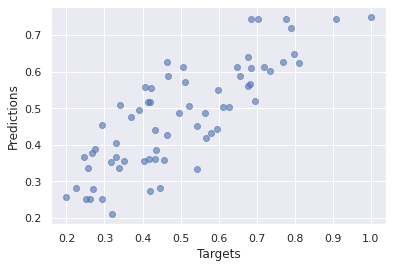

In [48]:
plt.scatter(y_test, prediction, alpha=0.6)
plt.xlabel('Targets')
plt.ylabel('Predictions')

plt.show()

### K-neighbors analysis

In [49]:
df_ks = pd.DataFrame()
mse_ks = []
ks = []
n_k = 200
for k in range(1, n_k):
    beer = KNN(k)
    mse_k = beer.mse(X_test, y_test)
    mse_ks.append(mse_k)
    ks.append(k)
df_ks['k-neigbors'] = ks
df_ks['MSE'] = mse_ks

In [50]:
df_ks.describe()

,k-neigbors,MSE
count,199.000000,199.000000
mean,100.000000,0.027175
std,57.590508,0.010181
min,1.000000,0.011500
25%,50.500000,0.019155
50%,100.000000,0.026184
75%,149.500000,0.033750
max,199.000000,0.050862


K neighbors that yield smallest mse

In [51]:
min_mse = df_ks['MSE'].min()
df_ks[df_ks['MSE']==min_mse]

,k-neigbors,MSE
7,8,0.0115


<AxesSubplot:xlabel='k-neigbors', ylabel='MSE'>

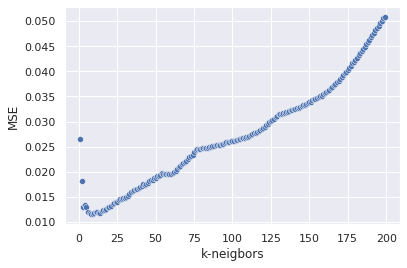

In [52]:
x_axis = df_ks['k-neigbors']
y_axis = df_ks['MSE']

sns.scatterplot(x=x_axis, y=y_axis)

<AxesSubplot:xlabel='k-neigbors', ylabel='MSE'>

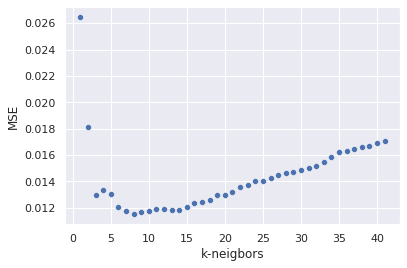

In [53]:
n_linhas = 40
x_axis = df_ks['k-neigbors'].loc[:n_linhas]
y_axis = df_ks['MSE'].loc[:n_linhas]

sns.scatterplot(x=x_axis, y=y_axis)